### scikit-learn: machine learning in Python (https://scikit-learn.org/stable/)

## Comparing models

In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### For classification

In [3]:
X = tips.drop("sex", axis = 1)
y = tips["sex"]

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

y = lb.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(y_test)

[1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1]


In [4]:
from sklearn.svm import SVC
clf1 = SVC(gamma="auto")
clf1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
pred1 = clf1.predict(X_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
pred2 = clf2.predict(X_test)
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1])

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc1 = accuracy_score(pred1, y_test)
acc2 = accuracy_score(pred2, y_test)
print("SVC Accuracy: {}; KNN Accuracy: {}\n".format(acc1, acc2))

# clr1 = classification_report(pred1, y_test)
# clr2 = classification_report(pred2, y_test)
# print("SVC Report: {}".format(clr1))
# print("KNN Report: {}".format(clr2))

cmat1 = confusion_matrix(pred1, y_test)
cmat2 = confusion_matrix(pred2, y_test)
print("Confusion Matrix format:\n[[True positive False positive]\n[False negative True negative]]\n")
print("SVC Matrix: \n{}\n".format(cmat1))
print("KNN Matrix: \n{}\n".format(cmat2))

SVC Accuracy: 0.7027027027027027; KNN Accuracy: 0.6756756756756757

Confusion Matrix format:
[[True positive False positive]
[False negative True negative]]

SVC Matrix: 
[[ 5  1]
 [21 47]]

KNN Matrix: 
[[ 6  4]
 [20 44]]



### For regression

#### Regression metrics
##### Mean Absolute Error (MAE)

$MAE=\frac{1}{n}\sum\limits^{n}_{i=1}|y_i - \hat{y}_i|$

##### Mean Square Error (MSE)

$MSE=\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2$

##### Root Mean Square Error (RMSE)

$RMSE=\sqrt{\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2}$

##### R^2 Score (Coefficient of determination)

From scikit: "Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0."

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [9]:
X = tips.drop('tip', axis = 1)
y = tips['tip']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['sex'] = lb.fit_transform(X['sex'])
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [10]:
from sklearn.ensemble import RandomForestRegressor
reg_cso = RandomForestRegressor(n_estimators = 1000, random_state = 42)
reg_cso.fit(X_train, y_train)

y_pred_cso = reg_cso.predict(X_test)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
reg_eca2 = KNeighborsRegressor(n_neighbors = 2)
reg_eca2.fit(X_train, y_train)

y_pred_eca2 = reg_eca2.predict(X_test)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
reg_jchs = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=0, loss='ls')
reg_jchs.fit(X_train, y_train)

y_pred_jchs = reg_jchs.predict(X_test)

In [13]:
from sklearn.neural_network import MLPRegressor
reg_jppgm = MLPRegressor()
reg_jppgm.fit(X_train, y_train)

y_pred_jppgm = reg_jppgm.predict(X_test)

In [14]:
from sklearn.linear_model import Ridge
reg_jrds = Ridge(alpha = .5)
reg_jrds.fit(X_train, y_train)

y_pred_jrds = reg_jrds.predict(X_test)

In [15]:
from sklearn.tree import DecisionTreeRegressor
reg_jvsg = DecisionTreeRegressor()
reg_jvsg.fit(X_train, y_train)

y_pred_jvsg = reg_jvsg.predict(X_test)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
reg_lar_vrvs = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 300)
reg_lar_vrvs.fit(X_train, y_train)

y_pred_lar_vrvs = reg_lar_vrvs.predict(X_test)

In [17]:
from sklearn.linear_model import BayesianRidge
reg_lcc4 = BayesianRidge()
reg_lcc4.fit(X_train, y_train)

y_pred_lcc4 = reg_lcc4.predict(X_test)

In [18]:
from sklearn.svm import SVR
reg_vbas = SVR(C = 100)
reg_vbas.fit(X_train, y_train)

y_pred_vbas = reg_vbas.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
from sklearn.svm import LinearSVR 
reg_vtls = LinearSVR(random_state=0, tol=1e-5)
reg_vtls.fit(X_train, y_train)

y_pred_vtls = reg_vtls.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = [
    [mean_absolute_error(y_test, y_pred_cso), mean_squared_error(y_test, y_pred_cso), np.sqrt(mean_squared_error(y_test, y_pred_cso)), r2_score(y_test, y_pred_cso)],
    [mean_absolute_error(y_test, y_pred_eca2), mean_squared_error(y_test, y_pred_eca2), np.sqrt(mean_squared_error(y_test, y_pred_eca2)), r2_score(y_test, y_pred_eca2)],
    [mean_absolute_error(y_test, y_pred_jchs), mean_squared_error(y_test, y_pred_jchs), np.sqrt(mean_squared_error(y_test, y_pred_jchs)), r2_score(y_test, y_pred_jchs)],
    [mean_absolute_error(y_test, y_pred_jppgm), mean_squared_error(y_test, y_pred_jppgm), np.sqrt(mean_squared_error(y_test, y_pred_jppgm)), r2_score(y_test, y_pred_jppgm)],
    [mean_absolute_error(y_test, y_pred_jrds), mean_squared_error(y_test, y_pred_jrds), np.sqrt(mean_squared_error(y_test, y_pred_jrds)), r2_score(y_test, y_pred_jrds)],
    [mean_absolute_error(y_test, y_pred_jvsg), mean_squared_error(y_test, y_pred_jvsg), np.sqrt(mean_squared_error(y_test, y_pred_jvsg)), r2_score(y_test, y_pred_jvsg)],
    [mean_absolute_error(y_test, y_pred_lar_vrvs), mean_squared_error(y_test, y_pred_lar_vrvs), np.sqrt(mean_squared_error(y_test, y_pred_lar_vrvs)), r2_score(y_test, y_pred_lar_vrvs)],
    [mean_absolute_error(y_test, y_pred_lcc4), mean_squared_error(y_test, y_pred_lcc4), np.sqrt(mean_squared_error(y_test, y_pred_lcc4)), r2_score(y_test, y_pred_lcc4)],
    [mean_absolute_error(y_test, y_pred_vbas), mean_squared_error(y_test, y_pred_vbas), np.sqrt(mean_squared_error(y_test, y_pred_vbas)), r2_score(y_test, y_pred_vbas)],
    [mean_absolute_error(y_test, y_pred_vtls), mean_squared_error(y_test, y_pred_vtls), np.sqrt(mean_squared_error(y_test, y_pred_vtls)), r2_score(y_test, y_pred_vtls)]
]

Text(0, 0.5, 'R2')

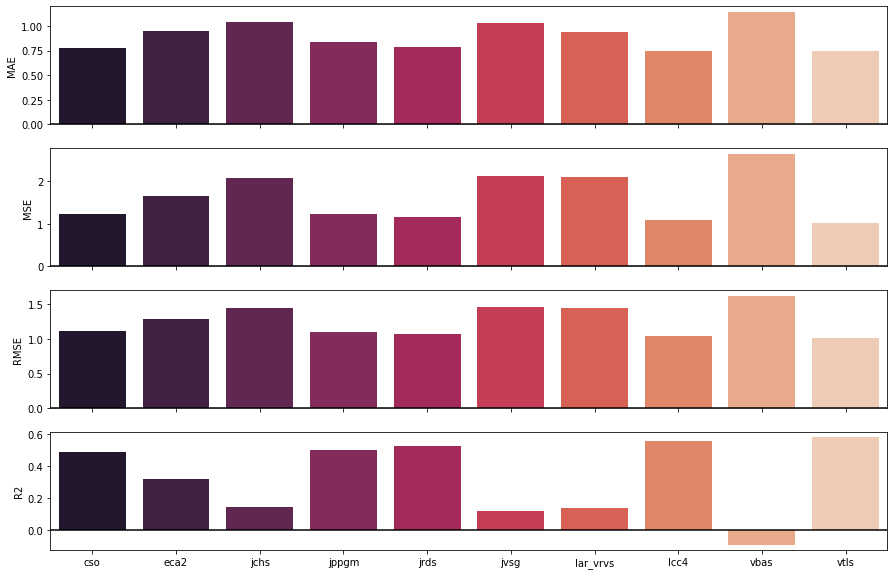

In [21]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

x = np.array(['cso', 'eca2', 'jchs', 'jppgm', 'jrds', 'jvsg', 'lar_vrvs', 'lcc4', 'vbas', 'vtls'])
sns.barplot(x = x, y = list(map(lambda r: r[0], results)), palette="rocket", ax = ax1)
sns.barplot(x = x, y = list(map(lambda r: r[1], results)), palette="rocket", ax = ax2)
sns.barplot(x = x, y = list(map(lambda r: r[2], results)), palette="rocket", ax = ax3)
sns.barplot(x = x, y = list(map(lambda r: r[3], results)), palette="rocket", ax = ax4)
ax1.axhline(0, color="k")
ax1.set_ylabel("MAE")
ax2.axhline(0, color="k")
ax2.set_ylabel("MSE")
ax3.axhline(0, color="k")
ax3.set_ylabel("RMSE")
ax4.axhline(0, color="k")
ax4.set_ylabel("R2")

## Finding optimal parameters

In [22]:
from sklearn.neighbors import KNeighborsRegressor
ks = np.arange(1,31)
results = np.zeros(30)
for k in ks:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results[k-1] = np.sqrt(mean_squared_error(y_test, y_pred))
best_k = results.argmin() + 1
low_rmse = results.min()
print ("Best number of neighbors is {} with RMSE equals to {}".format(best_k, low_rmse))    

Best number of neighbors is 21 with RMSE equals to 1.149155019699308


Text(0.5, 1.0, 'RMSE vs Number of neighbors')

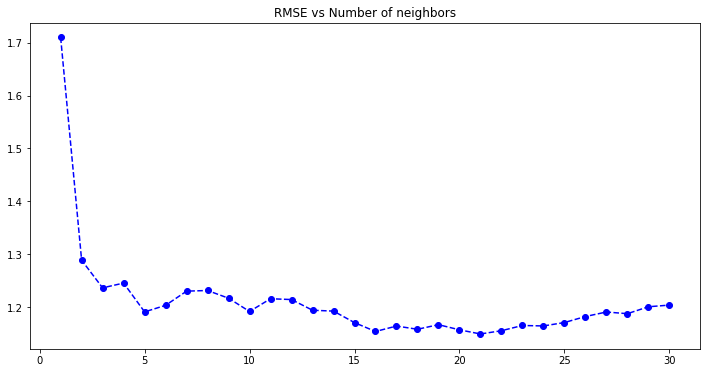

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(ks, results, marker='o', linestyle='--', color='blue')
plt.title("RMSE vs Number of neighbors")

### Cross-validation - http://scikit-learn.org/stable/modules/model_evaluation.html

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': list(range(1, 41))}
knn = KNeighborsRegressor()
grid = GridSearchCV(
    knn,
    parameters,
    cv = 10,
    scoring = 'neg_mean_squared_error',
    return_train_score = True,
    refit = True
)
grid.fit(X_train, y_train)
grid.best_params_
# grid.cv_results_

{'n_neighbors': 27}

Text(0, 0.5, 'RMSE 10-CV')

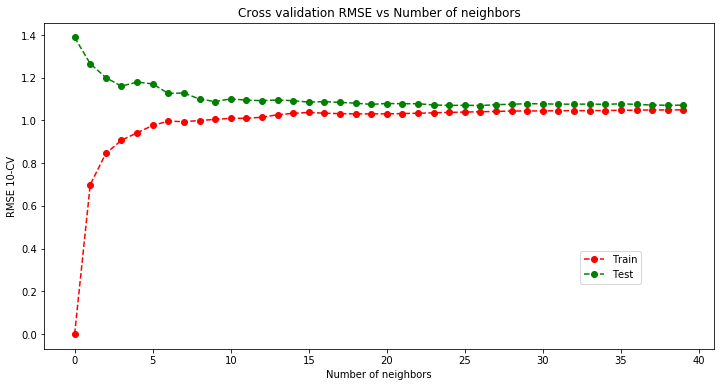

In [26]:
# Training errors
mean_cv_train = grid.cv_results_['mean_train_score']
rmse_cv_train = np.sqrt(np.abs(mean_cv_train))

# Test errors
mean_cv_test = grid.cv_results_['mean_test_score']
rmse_cv_test = np.sqrt(np.abs(mean_cv_test))

# Plotting
plt.figure(figsize=(12,6))
plt.plot(rmse_cv_train, marker = 'o', linestyle = '--', color = 'red')
plt.plot(rmse_cv_test, marker = 'o', linestyle = '--', color = 'green')
plt.legend(['Train', 'Test'], loc = (0.8, 0.2))
plt.title("Cross validation RMSE vs Number of neighbors")
plt.xlabel('Number of neighbors')
plt.ylabel('RMSE 10-CV')

In [29]:
best_knn = grid.best_estimator_
best_pred = best_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, best_pred))

1.1821574750336887

In [32]:
from sklearn.model_selection import RepeatedKFold

parameters = {'n_neighbors': list(range(1, 41))}
knn = KNeighborsRegressor()
grid = GridSearchCV(
    knn,
    parameters,
    cv = RepeatedKFold(n_splits = 10, n_repeats = 30),
    scoring = 'neg_mean_squared_error',
    return_train_score = True,
    refit = True
)
grid.fit(X_train, y_train)
grid.best_params_
# grid.cv_results_

{'n_neighbors': 39}